In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data_all=pd.read_csv('./imu_files_all_complete.csv')
data_all=pd.read_csv('./imu_files_all_complete_with_device_count_filtered.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),
  Text(38, 0, '39')])

<Figure size 2000x800 with 0 Axes>

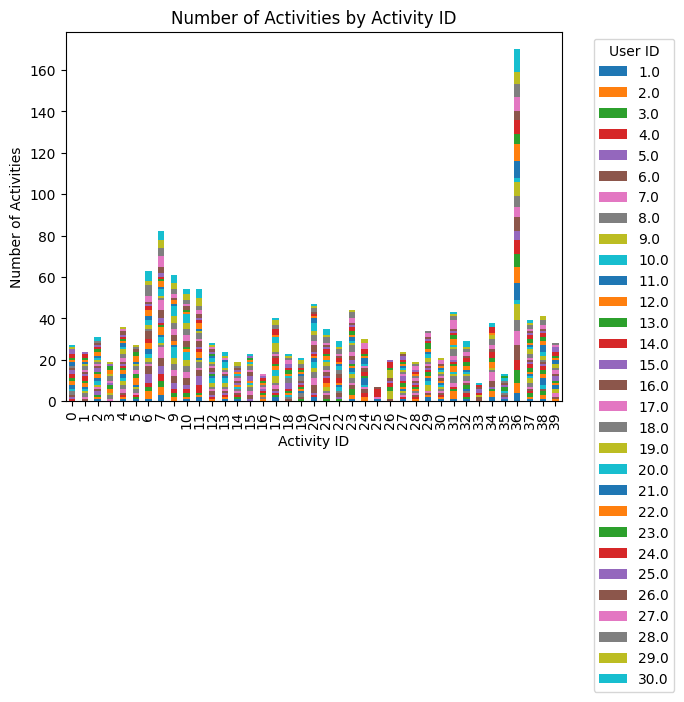

In [4]:
# Extract numeric parts from activity_id and user_id
# data_all['activity_id_num'] = data_all['activity_id'].str.extract('(\d+)').astype(int)
# data_all['user_id_num'] = data_all['user_id'].str.extract('(\d+)').astype(int)

# Count activities for each user and activity combination
activity_counts = data_all.groupby(['activity_id_num', 'user_id_num']).size().unstack(fill_value=0)

# Sort the columns (user_id) and index (activity_id) numerically
activity_counts = activity_counts.reindex(sorted(activity_counts.columns), axis=1)
activity_counts = activity_counts.sort_index()

# Create a stacked bar plot
plt.figure(figsize=(20, 8))
activity_counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Number of Activities by Activity ID')
plt.xlabel('Activity ID')
plt.ylabel('Number of Activities')
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

In [5]:
# filter out the activities which are performed by all 15 users
# Count number of users who performed each activity
users_per_activity = (activity_counts > 0).sum(axis=1)

# Filter activities where all 15 users participated
activities_all_users = users_per_activity[users_per_activity == 15].index

print("Activities performed by all users:", activities_all_users.tolist())

# Remove these activities from activity_counts
activity_counts_filtered = activity_counts.drop(activities_all_users)

activity_counts


Activities performed by all users: []


user_id_num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
activity_id_num,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,1,0,2,0,1,...,2,1,1,2,2,0,0,0,1,1
1,0,0,0,0,0,1,1,2,1,1,...,1,1,1,2,1,0,0,0,0,0
2,1,1,1,0,2,1,1,0,1,2,...,1,2,1,1,1,1,0,1,0,2
3,0,0,0,0,0,0,1,2,1,0,...,0,2,2,0,1,0,0,0,1,0
4,1,1,0,1,0,1,2,2,2,1,...,2,1,1,1,1,2,1,0,1,0
5,1,0,1,1,0,0,1,2,1,0,...,1,3,2,0,0,1,0,1,1,0
6,1,4,2,2,4,4,1,1,2,2,...,2,3,0,2,1,1,3,5,2,5
7,3,4,3,3,4,4,5,1,1,3,...,1,3,1,1,2,3,5,4,4,4
9,0,2,2,2,3,3,3,3,3,5,...,1,2,0,0,0,1,2,2,3,4
